In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [58]:
df = pd.read_csv("bitcoin.csv")

# 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')

df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)


C:\Users\SIAM\AppData\Local\Temp\ipykernel_12700\1862895292.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\SIAM\AppData\Local\Temp\ipykernel_12700\1862895292.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


In [59]:
# Lag features
df['Prev_Close'] = df['Close'].shift(1)
df['Price_Change'] = df['Close'] - df['Prev_Close']
df.dropna(inplace=True)


features = ['Open', 'High', 'Low', 'Volume', 'Prev_Close', 'Price_Change', '7-day MA', '30-day MA', '30-day Volatility']
target = 'Close'

X = df[features]
y = df[target]

# Train-test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [64]:
# Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

# Model Evaluation for Train Data
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

print(f"Train Data - MAE: {mae_train}")
print(f"Train Data - MSE: {mse_train}")
print(f"Train Data - RMSE: {rmse_train}")
print(f"Train Data - R2 Score: {r2_train}")

# Model Evaluation for Test Data
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Test Data - MAE: {mae_test}")
print(f"Test Data - MSE: {mse_test}")
print(f"Test Data - RMSE: {rmse_test}")
print(f"Test Data - R2 Score: {r2_test}")

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100
print(f"MAPE: {mape}%")



Train Data - MAE: 63.77872246021715
Train Data - MSE: 17276.68454510911
Train Data - RMSE: 131.44080243634056
Train Data - R2 Score: 0.9999551918583585
Test Data - MAE: 174.4988071467367
Test Data - MSE: 130444.77113593688
Test Data - RMSE: 361.17138748236533
Test Data - R2 Score: 0.9996908590688733
MAPE: 1.124482476279817%


In [55]:
# Hyperparameter Tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test)



Fitting 5 folds for each of 81 candidates, totalling 405 fits


In [71]:
y_pred_train_best = best_model.predict(X_train)
y_pred_test_best = best_model.predict(X_test)

Train Score: 0.9999562740568729
Test Score: 0.9996979835486728


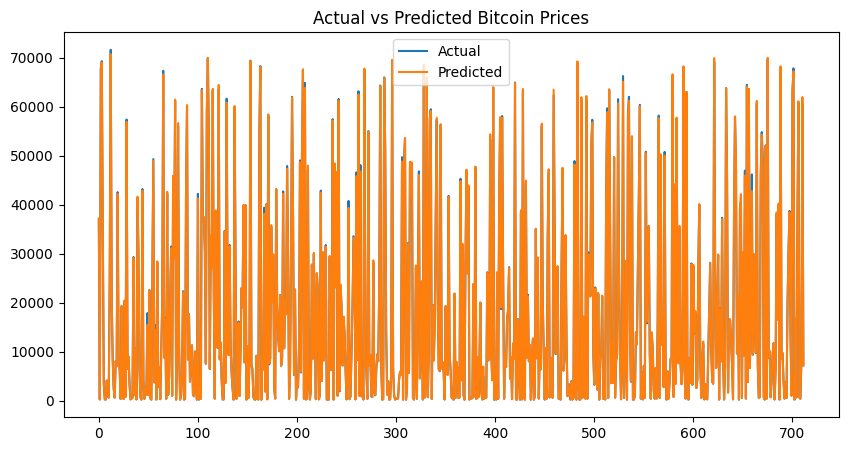

In [69]:
# Checking for Overfitting
train_score = best_model.score(X_train, y_train)
test_score = best_model.score(X_test, y_test)

print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")

# Plot Actual vs Predicted
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Actual")
plt.plot(y_pred_best, label="Predicted")
plt.legend()
plt.title("Actual vs Predicted Bitcoin Prices")
plt.show()


In [72]:
# Model Evaluation for Train Data after Hyperparameter Tuning
mae_train_best = mean_absolute_error(y_train, y_pred_train_best)
mse_train_best = mean_squared_error(y_train, y_pred_train_best)
rmse_train_best = np.sqrt(mse_train_best)
r2_train_best = r2_score(y_train, y_pred_train_best)

print(f"Train Data after Tuning - MAE: {mae_train_best}")
print(f"Train Data after Tuning - MSE: {mse_train_best}")
print(f"Train Data after Tuning - RMSE: {rmse_train_best}")
print(f"Train Data after Tuning - R2 Score: {r2_train_best}")

# Model Evaluation for Test Data after Hyperparameter Tuning
mae_test_best = mean_absolute_error(y_test, y_pred_test_best)
mse_test_best = mean_squared_error(y_test, y_pred_test_best)
rmse_test_best = np.sqrt(mse_test_best)
r2_test_best = r2_score(y_test, y_pred_test_best)

print(f"Test Data after Tuning - MAE: {mae_test_best}")
print(f"Test Data after Tuning - MSE: {mse_test_best}")
print(f"Test Data after Tuning - RMSE: {rmse_test_best}")
print(f"Test Data after Tuning - R2 Score: {r2_test_best}")

Train Data after Tuning - MAE: 63.259015242479755
Train Data after Tuning - MSE: 16859.421037521006
Train Data after Tuning - RMSE: 129.8438332672022
Train Data after Tuning - R2 Score: 0.9999562740568729
Test Data after Tuning - MAE: 172.28650820860705
Test Data after Tuning - MSE: 127438.53338699286
Test Data after Tuning - RMSE: 356.98534057716273
Test Data after Tuning - R2 Score: 0.9996979835486728


In [73]:
# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred_test_best) / y_test)) * 100
print(f"MAPE: {mape}%")

MAPE: 1.11370561667975%
